In [1]:
from scipy.stats import kurtosis, skew
from scipy import signal
from numpy import load
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import sys, os

ROOT_PATH = os.path.abspath("..").split("data_processing")[0]
print("ROOT", ROOT_PATH)
module_path = os.path.abspath(os.path.join(ROOT_PATH+"/utils/"))
if module_path not in sys.path:
    print("appended")
    sys.path.append(module_path)

import functions as f

module_path = os.path.abspath(os.path.join(ROOT_PATH+"/data_processing/"))
if module_path not in sys.path:
    print("appended")
    sys.path.append(module_path)
    
import wt_data

import ff_transform
import envelope
import explore_fft_time_data

ROOT /Users/stianismar/Dropbox/gitProsjekter/master-thesis/src
appended
appended
ROOT /Users/stianismar/Dropbox/gitProsjekter/master-thesis/src
/Users/stianismar/Dropbox/gitProsjekter/master-thesis/src
ROOT /Users/stianismar/Dropbox/gitProsjekter/master-thesis/src
ROOT /Users/stianismar/Dropbox/gitProsjekter/master-thesis/src


In [ ]:
from PyEMD import EEMD
import numpy as np
import pylab as plt

# Define signal
t = np.linspace(0, 1, 200)

sin = lambda x,p: np.sin(2*np.pi*x*t+p)
S = 3*sin(18,0.2)*(t-0.2)**2
S += 5*sin(11,2.7)
S += 3*sin(14,1.6)
S += 1*np.sin(4*2*np.pi*(t-0.8)**2)
S += t**2.1 -t

# Assign EEMD to `eemd` variable
eemd = EEMD()

# Say we want detect extrema using parabolic method
emd = eemd.EMD
emd.extrema_detection="parabol"

# Execute EEMD on S
eIMFs = eemd.eemd(S, t)
nIMFs = eIMFs.shape[0]

# Plot results
plt.figure(figsize=(12,9))
plt.subplot(nIMFs+1, 1, 1)
plt.plot(t, S, 'r')

for n in range(nIMFs):
    plt.subplot(nIMFs+1, 1, n+2)
    plt.plot(t, eIMFs[n], 'g')
    plt.ylabel("eIMF %i" %(n+1))
    plt.locator_params(axis='y', nbins=5)

plt.xlabel("Time [s]")
plt.tight_layout()
plt.savefig('eemd_example', dpi=120)
plt.show()

In [2]:
vib_9500_10000 = load('../../sensor_data/all_enveloped_wt04_9500_10000.npz')
vib_9500_10000 = vib_9500_10000['arr_0']

In [3]:
times_wt4 = load('../../sensor_data/intervals_times_wt04.npz')

In [4]:
times_wt4 = times_wt4['arr_0']

In [5]:
print(vib_9500_10000[0].shape)
times_wt4[0].shape

(262144,)


(262144,)

In [ ]:
from PyEMD import EEMD
import numpy as np
import pylab as plt

# Define signal
t = np.linspace(0, 1, len(times_wt4[0]))

In [ ]:
s = vib_9500_10000[0]
t = times_wt4[0]

# Assign EEMD to `eemd` variable
eemd = EEMD()

# Say we want detect extrema using parabolic method
emd = eemd.EMD
emd.extrema_detection="parabol"

# Execute EEMD on S
eIMFs = eemd.eemd(s, times_wt4[0])
nIMFs = eIMFs.shape[0]

# Plot results
plt.figure(figsize=(12,9))
plt.subplot(nIMFs+1, 1, 1)
plt.plot(times_wt4[0], vib_9500_10000[0], 'r')

for n in range(nIMFs):
    plt.subplot(nIMFs+1, 1, n+2)
    plt.plot(t, eIMFs[n], 'g')
    plt.ylabel("eIMF %i" %(n+1))
    plt.locator_params(axis='y', nbins=5)

plt.xlabel("Time [s]")
plt.tight_layout()
plt.savefig('eemd_example', dpi=120)
plt.show()

In [ ]:
from PyEMD import EMD
import numpy as np
import pylab as plt
# Define signal

# Execute EMD on signal
IMF = EMD().emd(vib_9500_10000[0][0:10000],times_wt4[0][0:10000])
N = IMF.shape[0]+1

NameError: name 'IMF' is not defined

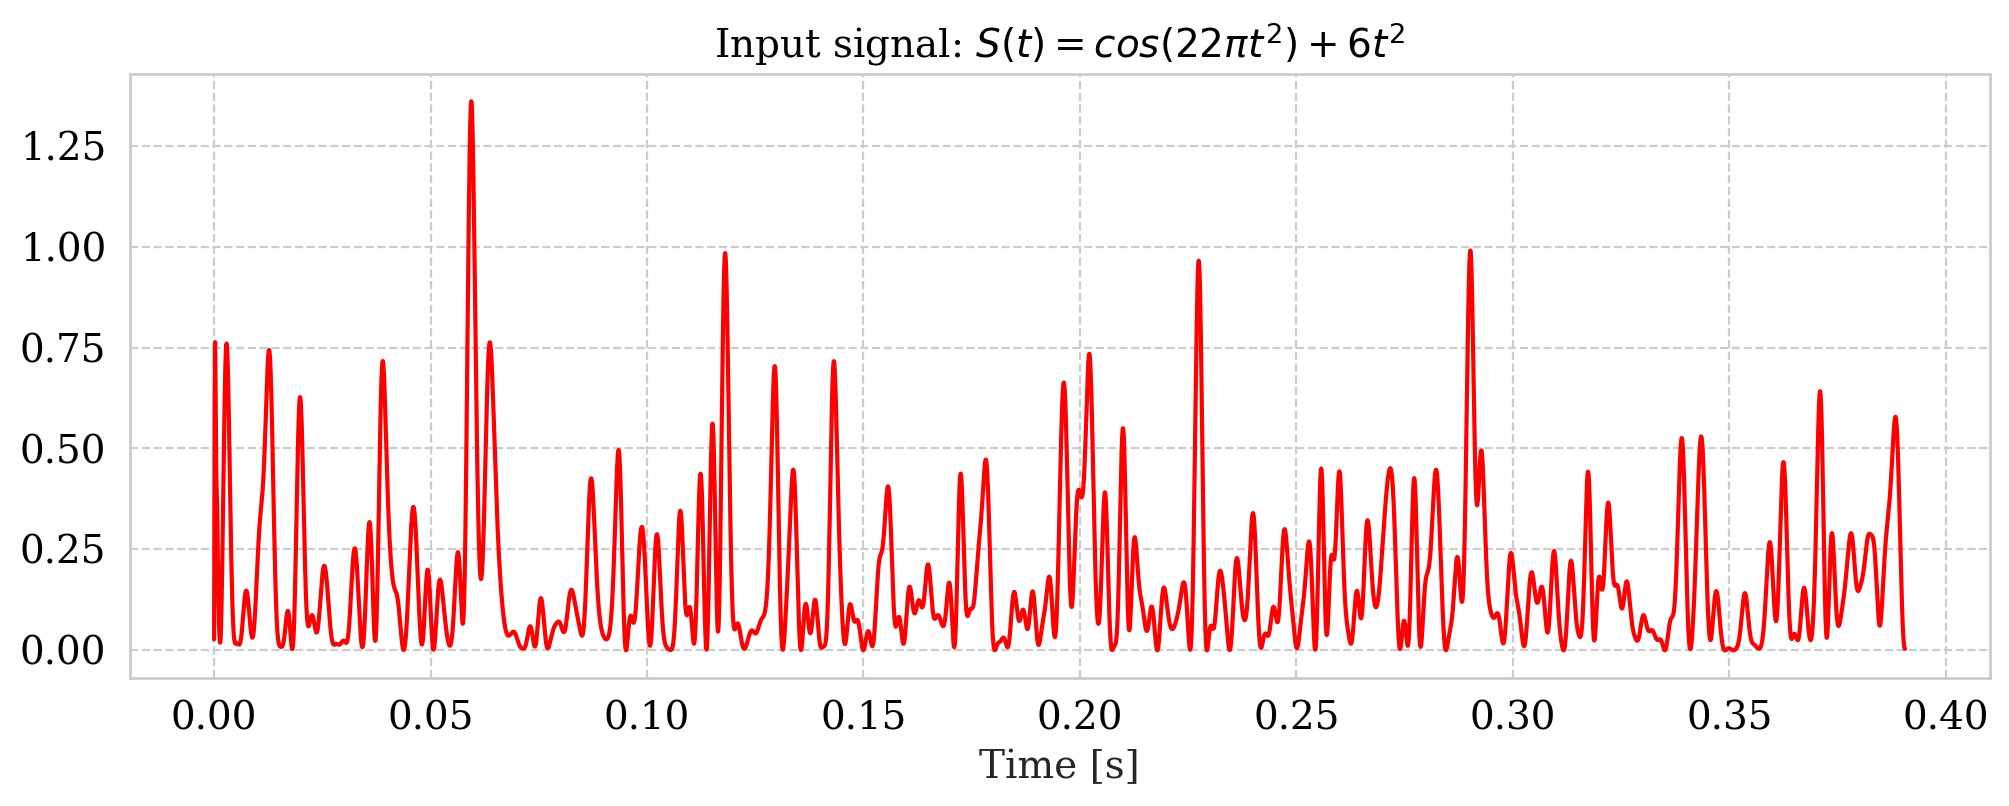

In [11]:
t = times_wt4[0][0:10000]
s= vib_9500_10000[0][0:10000]
# Plot results
# plt.subplot(N,1,1)
plt.plot(times_wt4[0][0:10000], vib_9500_10000[0][0:10000], 'r')
plt.title("Input signal: $S(t)=cos(22\pi t^2) + 6t^2$")
plt.xlabel("Time [s]")
print(IMF.shape)
f, axs = plt.subplots(len(IMF),1,figsize=(15,20))
for n, imf in enumerate(IMF):
    axs[n].plot(t, imf, 'g')
    plt.title("IMF "+str(n+1))
    plt.xlabel("Time [s]")
    plt.margins(0)


In [1]:
from PyEMD import EEMD
import numpy as np
import pylab as plt
# Define signal
S = vib_9500_10000[0][0:40000]
t = times_wt4[0][0:40000]

# Assign EEMD to `eemd` variable
eemd = EEMD()
# Say we want detect extrema using parabolic method
emd = eemd.EMD
emd.extrema_detection="parabol"
# Execute EEMD on S
eIMFs = eemd.eemd(S, t)
nIMFs = eIMFs.shape[0]
# Plot results
plt.figure(figsize=(12,9))
plt.subplot(nIMFs+1, 1, 1)
plt.plot(t, S, 'r')


NameError: name 'vib_9500_10000' is not defined

In [7]:
len(eIMFs[2])

40000

In [ ]:
plt.plot(t, S, 'r')
f, axs = plt.subplots((nIMFs),1,figsize=(15,20))

for n in range(nIMFs):
    axs[n].plot(t, eIMFs[n], 'g')
    plt.ylabel("eIMF %i" %(n+1))
    plt.locator_params(axis='y', nbins=5)
    plt.xlabel("Time [s]")
    plt.tight_layout()
    plt.savefig('eemd_example', dpi=120)
plt.show()